<a href="https://colab.research.google.com/github/imnadiarasheed/ML/blob/main/Ass1_LinReg_GD_(Multiple_Variable).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_train=pd.read_csv("drive/MyDrive/Colab Notebooks/ML/Assignment-1/Dataset/train.csv")
df_test=pd.read_csv("drive/MyDrive/Colab Notebooks/ML/Assignment-1/Dataset/test.csv")
df_gt=pd.read_csv("drive/MyDrive/Colab Notebooks/ML/Assignment-1/Dataset/gender_submission.csv")
#print(df_train.head(5)), print(df_test.head(5)), print(df_gt.head(5))

In [3]:
df_train.drop("PassengerId",axis=1,inplace=True), df_test.drop("PassengerId",axis=1,inplace=True)
df_train.drop("Name",axis=1,inplace=True), df_test.drop("Name",axis=1,inplace=True)
df_train.drop("Ticket",axis=1,inplace=True), df_test.drop("Ticket",axis=1,inplace=True)
df_train.drop("Cabin",axis=1,inplace=True), df_test.drop("Cabin",axis=1,inplace=True)
print(df_train), print(df_test)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]
     Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0   

(None, None)

**Preprocessing**

**Data Cleaning**

In [4]:
print(df_train.isnull().sum()), print(df_test.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


(None, None)

In [5]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
#df_train['Embarked'].fillna(df_train['Embarked'].mode(),inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

In [6]:
print(df_train.isnull().sum()), print(df_test.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


(None, None)

**Label Encoding**

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])
df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])
print(df_train), print(df_test)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.000000      1      0   7.2500         2
1           1       1    0  38.000000      1      0  71.2833         0
2           1       3    0  26.000000      0      0   7.9250         2
3           1       1    0  35.000000      1      0  53.1000         2
4           0       3    1  35.000000      0      0   8.0500         2
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    1  27.000000      0      0  13.0000         2
887         1       1    0  19.000000      0      0  30.0000         2
888         0       3    0  29.699118      1      2  23.4500         2
889         1       1    1  26.000000      0      0  30.0000         0
890         0       3    1  32.000000      0      0   7.7500         1

[891 rows x 8 columns]
     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         1
1 

(None, None)

**Training and Testing using Linear Regression GD**

In [13]:
# LINEAR REGRESSION USING SELF DEFINED GRADIENT DESCENT

def plot(x, y, predicted_values, size=10, x_label='x', y_label='y'):
    plt.scatter(x, y, s=size, color='b')
    plt.plot(x, predicted_values, color='r')
    set_labels(x_label, y_label)


def ploty(y, x_label='x', y_label='y'):
    plt.plot(y)
    set_labels(x_label, y_label)


def set_labels(x_label, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.

    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set

    Attributes
    ----------
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration"""

    def __init__(self, eta=0.05, n_iterations=500):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """Fit the training data

        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values

        Returns
        -------
        self : object"""

        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)

        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.

        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples

        Returns
        -------
        Predicted value"""
        return np.dot(x, self.w_)

class PerformanceMetrics:
    """Defines methods to evaluate the model

    Parameters
    ----------
    y_actual : array-like, shape = [n_samples]
            Observed values from the training samples
    y_predicted : array-like, shape = [n_samples]
            Predicted values from the model"""

    def __init__(self, y_actual, y_predicted):
        self.y_actual = y_actual
        self.y_predicted = y_predicted

    def compute_rmse(self):
        """Compute the root mean squared error

        Returns
        ------
        rmse : root mean squared error"""
        return np.sqrt(self.sum_of_square_of_residuals())

    def compute_r2_score(self):
        """Compute the r-squared score

            Returns
            ------
            r2_score : r-squared score"""
        # sum of square of residuals
        ssr = self.sum_of_square_of_residuals()

        # total sum of errors
        sst = np.sum((self.y_actual - np.mean(self.y_actual)) ** 2)

        return 1 - (ssr / sst)

    def sum_of_square_of_residuals(self):
        return np.sum((self.y_actual - self.y_predicted) ** 2)


def generate_data_set(xx,yy):
    """ Generates Random Data

    Returns
    -------
    x : array-like, shape = [n_samples, n_features]
            Training samples
    y : array-like, shape = [n_samples, n_target_values]
            Target values"""
    x=xx.to_numpy()
    y=yy.to_numpy()
    return x, y

In [17]:
def funx(vars):
    # initializing the model
    linear_regression_model = LinearRegressionUsingGD()

    # generate the data set
    X_train, y_train = generate_data_set(X_train1, y_train1)
    X_test, y_test = generate_data_set(X_test1, y_test1)
    #print(x), print(y)
    # transform the feature vectors to include the bias term
    # adding 1 to all the instances of the training set.
    ms = X_train.shape[0]
    ns = X_test.shape[0]
    X_train = np.c_[np.ones((ms, 1)), X_train]
    X_test = np.c_[np.ones((ns, 1)), X_test]

    # fit/train the model
    linear_regression_model.fit(X_train, y_train)

    # predict values
    y_train_predict = linear_regression_model.predict(X_train)
    y_test_predict = linear_regression_model.predict(X_test)

    # model parameters
    print(linear_regression_model.w_)
    intercept, coeffs1, coeffs2, coeffs3, coeffs4, coeffs5, coeffs6, coeffs7 = linear_regression_model.w_

    # cost_function
    cost_function = linear_regression_model.cost_

    # plotting
    #plot(x, y, predicted_values)
    ploty(cost_function, 'no of iterations', 'cost function')

    # computing metrics
    metrics_train = PerformanceMetrics(y_train, y_train_predict)
    rmse_train = metrics_train.compute_rmse()
    r2_score_train = metrics_train.compute_r2_score()

    metrics_test = PerformanceMetrics(y_test, y_test_predict)
    rmse_test = metrics_test.compute_rmse()
    r2_score_test = metrics_test.compute_r2_score()
    print(min(cost_function))

    print('The intercept is {}'.format(intercept))
    print('The coefficient-1 is {}'.format(coeffs1))
    print('The coefficient-2 is {}'.format(coeffs2))
    print('The coefficient-3 is {}'.format(coeffs3))
    print('The coefficient-4 is {}'.format(coeffs4))
    print('The coefficient-5 is {}'.format(coeffs5))
    print('The coefficient-6 is {}'.format(coeffs6))
    print('The coefficient-7 is {}'.format(coeffs7))

    print("\nThe model performance for training set")
    print("--------------------------------------")
    print('Root mean squared error of the model is {}.'.format(rmse_train))
    print('R-squared score is {}.'.format(r2_score_train))
    # print(intercept_values), print(coeffs_values)

    print("\nThe model performance for test set")
    print("--------------------------------------")
    print('Root mean squared error of the model is {}.'.format(rmse_test))
    print('R-squared score is {}.'.format(r2_score_test))

    """iter = 0  # Initial iteration counter
    itersteps = 500  # Total number of iterations
    
    # Initial guesses for linear regression model of y=mx+b and arrays to keep track of values over iterations
    m = np.zeros(itersteps)
    b = np.zeros(itersteps)
    J = np.zeros(itersteps)
    # Creating mesh for 3D Surface Plot of MSE
    mm = np.linspace(-1, 1, 1000)
    bb = np.linspace(-1, 1, 1000)
    mmm, bbb = np.meshgrid(mm, bb)
    
    JJ = np.zeros([len(mm), len(bb)])
    n = X_train.shape[0]
    
    # Calculating values of MSE for different combinations of m and b
    for i in range(len(mm)):
        for j in range(len(bb)):
            #print('i: ',i, 'j: ', j)
            yy = mmm[i, j] * X_train + bbb[i, j]
            JJ[i, j] = 1 / n * np.sum((y_train - yy) ** 2)
    
    # 3D Surface Plot
    fig3 = plt.figure()
    ax4 = fig3.gca(projection='3d')
    surf = ax4.plot_surface(mmm, bbb, JJ, cmap=plt.cm.jet)
    fig3.colorbar(surf)

    ax4.plot(m[:-1], b[:-1], J[:-1], 'red')
    ax4.scatter(m[-2], b[-2], J[-2], c='b', marker="o",label='Gradient Descent')
    ax4.text(m[-2], b[-2], J[-2], '%s' % ('MSE: '+str(round(J[-2],5))), color='k')
    ax4.set_xlabel('m')
    ax4.set_ylabel('b')
    ax4.set_zlabel('MSE')
    ax4.set_title('3D Surface Plot of MSE')

    # Acquiring and plotting minimum value of MSE
    i_min, j_min = np.unravel_index(JJ.argmin(), JJ.shape)
    ax4.scatter(mmm[i_min, j_min], bbb[i_min, j_min], np.min(JJ), c='g', marker="o",label='3D Plot')
    ax4.text(mmm[i_min, j_min], bbb[i_min, j_min], np.min(JJ), '%s' % ('MSE: '+str(round(np.min(JJ),5))), color='k')
    
    ax4.legend(bbox_to_anchor=(0.15, .50), fontsize='x-small')
    print(str(round(np.min(JJ),5)))

    # Calculating linear fit and errors for both methods
    # Gradient Descent
    yy = m[-1] * X_train + b[-1] # Predicted Values
    y2 = m[-1] * X_train + b[-1] # Linear fit
    SSR1 = np.sum((yy - np.mean(y_train)) ** 2)
    SSE1 = np.sum((y_train - yy) ** 2)
    SSTO1 = np.sum((y_train - np.mean(y_train)) ** 2)
    R_sq1 = 1-SSE1/SSTO1
    
    # 3D Plot
    yyy = mmm[i_min, j_min] * X_train + bbb[i_min, j_min] # Predicted Values
    yyy2 = mmm[i_min, j_min] * X_train + bbb[i_min, j_min] # Linear fit
    SSR2 = np.sum((yyy - np.mean(y_train)) ** 2)
    SSE2 = np.sum((y_train - yyy) ** 2)
    SSTO2 = np.sum((y_train - np.mean(y_train)) ** 2)
    R_sq2 = 1-SSE2/SSTO2

    # Contour plot of 3D plot
    fig6, ax7 = plt.subplots(figsize=(5, 5))
    ax7.contour(mmm, bbb, JJ, 100, cmap=plt.cm.jet);
    ax7.plot(m[:-1], b[:-1], 'red')
    ax7.scatter(m[-2], b[-2], c='b', marker="o",label='Gradient Descent: y=' + str(round(m[-1], 5)) + '*x+' + str(round(b[-1], 5)) + ' $R^2=$' + str(round(R_sq1, 5)))
    ax7.text(m[-2], b[-2], '%s' % ('MSE: '+str(round(J[-2],5))), color='k')
    ax7.scatter(mmm[i_min, j_min], bbb[i_min, j_min], c='g', marker="o",label='3D Plot: y=' + str(round(mmm[i_min, j_min], 5)) + '*x+' + str(round(bbb[i_min, j_min], 5)) + ' $R^2=$' + str(round(R_sq2, 5)))
    ax7.text(mmm[i_min, j_min], bbb[i_min, j_min], '%s' % ('MSE: '+str(round(np.min(JJ),5))), color='k')
    ax7.set_xlabel('m')
    ax7.set_ylabel('b')
    ax7.set_title('Contour Plot of MSE')
    ax7.legend()"""

In [9]:
def funxAlpha(vars):
    # initializing the model
    linear_regression_model = LinearRegressionUsingGD()

    # generate the data set
    X_train, y_train = generate_data_set(X_train1, y_train1)
    X_test, y_test = generate_data_set(X_test1, y_test1)
    #print(x), print(y)
    # transform the feature vectors to include the bias term
    # adding 1 to all the instances of the training set.
    ms = X_train.shape[0]
    ns = X_test.shape[0]
    X_train = np.c_[np.ones((ms, 1)), X_train]
    X_test = np.c_[np.ones((ns, 1)), X_test]

    # fit/train the model
    linear_regression_model.fit(X_train, y_train)

    # predict values
    y_train_predict = linear_regression_model.predict(X_train)
    y_test_predict = linear_regression_model.predict(X_test)

    # model parameters
    #print(linear_regression_model.w_)
    intercept, coeffs1, coeffs2, coeffs3, coeffs4, coeffs5, coeffs6, coeffs7 = linear_regression_model.w_

    # cost_function
    cost_function = linear_regression_model.cost_

    # plotting
    #plot(x, y, predicted_values)
    ploty(cost_function, 'no of iterations', 'cost function')

    # computing metrics
    metrics_train = PerformanceMetrics(y_train, y_train_predict)
    rmse_train = metrics_train.compute_rmse()
    r2_score_train = metrics_train.compute_r2_score()

    metrics_test = PerformanceMetrics(y_test, y_test_predict)
    rmse_test = metrics_test.compute_rmse()
    r2_score_test = metrics_test.compute_r2_score()
    print(min(cost_function))

**Data Normalization & Feature Selection & Surface and Contour Plots**

[[ 1.05752713]
 [-0.12237178]
 [-0.50737928]
 [-0.05849231]
 [-0.03269242]
 [-0.00814508]
 [ 0.24915799]
 [-0.02666436]]


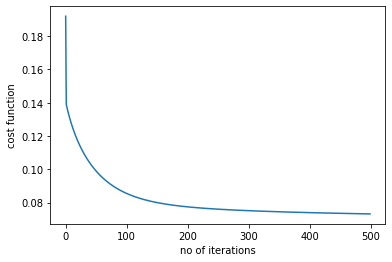

0.07318262409961913
The intercept is [1.05752713]
The coefficient-1 is [-0.12237178]
The coefficient-2 is [-0.50737928]
The coefficient-3 is [-0.05849231]
The coefficient-4 is [-0.03269242]
The coefficient-5 is [-0.00814508]
The coefficient-6 is [0.24915799]
The coefficient-7 is [-0.02666436]

The model performance for training set
--------------------------------------
Root mean squared error of the model is 11.4192806259736.
R-squared score is 0.38119082391626546.

The model performance for test set
--------------------------------------
Root mean squared error of the model is 5.284629666499473.
R-squared score is 0.7112778027889948.


In [18]:
X_train=df_train.copy()
X_test=df_test.copy()
y_test=df_gt.copy()

X_train['Fare'] = X_train['Fare'] / X_train['Fare'].max()
X_train['Age'] = X_train['Age'] / X_train['Age'].max()
X_test['Fare'] = X_test['Fare'] / X_test['Fare'].max()
X_test['Age'] = X_test['Age'] / X_test['Age'].max()

y_train1 = X_train[['Survived']]
X_train1 = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_test1 = y_test[['Survived']]
X_test1 = X_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
#print(X_train), print(y_train), print(X_test), print(y_test)

funx('All Variables')
#X_test1

**Data Normalization & Feature Selection & Learning Rate Check**

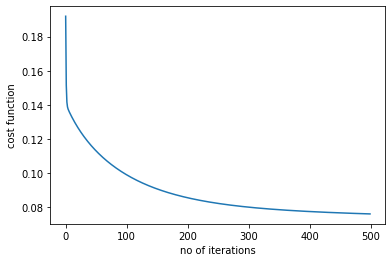

0.07603547748005893


In [ ]:
X_train=df_train.copy()
X_test=df_test.copy()
y_test=df_gt.copy()

X_train['Fare'] = X_train['Fare'] / X_train['Fare'].max()
X_train['Age'] = X_train['Age'] / X_train['Age'].max()
X_test['Fare'] = X_test['Fare'] / X_test['Fare'].max()
X_test['Age'] = X_test['Age'] / X_test['Age'].max()

y_train1 = X_train[['Survived']]
X_train1 = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_test1 = y_test[['Survived']]
X_test1 = X_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
#print(X_train), print(y_train), print(X_test), print(y_test)

funxAlpha('All Variables- eta=0.05')

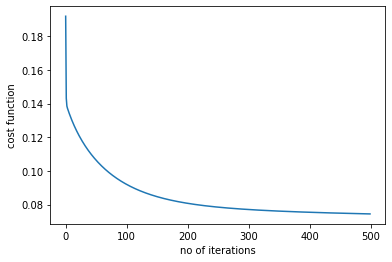

0.0744733455895562


In [ ]:
X_train=df_train.copy()
X_test=df_test.copy()
y_test=df_gt.copy()

X_train['Fare'] = X_train['Fare'] / X_train['Fare'].max()
X_train['Age'] = X_train['Age'] / X_train['Age'].max()
X_test['Fare'] = X_test['Fare'] / X_test['Fare'].max()
X_test['Age'] = X_test['Age'] / X_test['Age'].max()

y_train1 = X_train[['Survived']]
X_train1 = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_test1 = y_test[['Survived']]
X_test1 = X_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
#print(X_train), print(y_train), print(X_test), print(y_test)

funxAlpha('All Variables- eta=0.07')

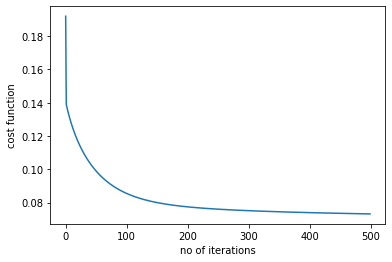

0.07318262409961913


In [14]:
X_train=df_train.copy()
X_test=df_test.copy()
y_test=df_gt.copy()

X_train['Fare'] = X_train['Fare'] / X_train['Fare'].max()
X_train['Age'] = X_train['Age'] / X_train['Age'].max()
X_test['Fare'] = X_test['Fare'] / X_test['Fare'].max()
X_test['Age'] = X_test['Age'] / X_test['Age'].max()

y_train1 = X_train[['Survived']]
X_train1 = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_test1 = y_test[['Survived']]
X_test1 = X_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
#print(X_train), print(y_train), print(X_test), print(y_test)

funxAlpha('All Variables- eta=0.1')